# Informe cuantitativo

usamos el screaner de finvist https://finviz.com/ encontrar las 6 companias con mayor capitalización bursatil en el mercado.

In [2]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
!pip install --upgrade pandas
import scipy.stats

C:\Users\pipeq\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
%load_ext autoreload
%autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import risk as r

In [5]:
# Acceso a precios historicos de multiples tickers 
prices = yf.download(tickers=['MSFT', 'AAPL', 'NVDA', 'GOOG', 'AMZN'],
                     interval='1mo',
                     start='2018-01-01',
                     end='2024-01-01')['Adj Close']

[*********************100%%**********************]  5 of 5 completed


In [11]:
prices.index.to_period('M')

PeriodIndex(['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
             '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
             '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
             '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
             '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
             '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
             '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
             '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
             '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
             '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12',
             '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
             '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12'],
            dtype='period[M]', name='Date')

In [19]:
prices.columns

Index(['APPLE', 'AMAZON', 'GOOGLE', 'MICROSOFT', 'NVIDIA'], dtype='object')

In [18]:
prices.columns=['APPLE', 'AMAZON', 'GOOGLE', 'MICROSOFT', 'NVIDIA']

In [21]:
rt=prices.pct_change().dropna()

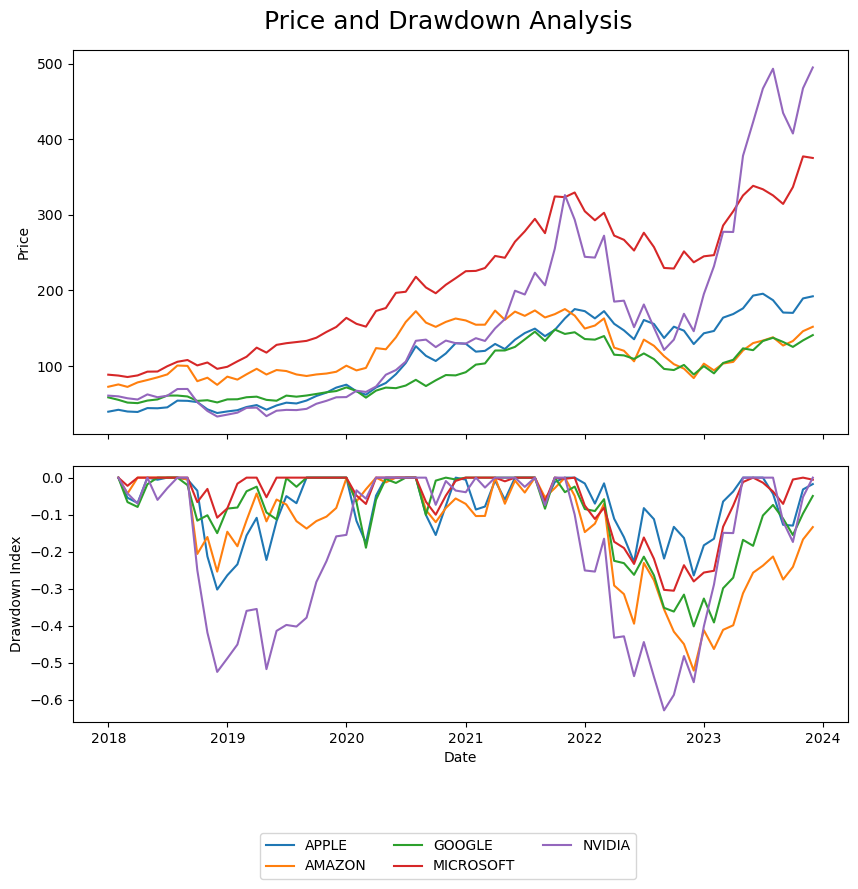

In [90]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 2], 'hspace': 0.1})

# Plotting the prices on the first subplot
ax1.plot(prices)
ax1.set_ylabel('Price')
# Note: No need for xlabel here as it's shared with the second subplot

# Plotting the drawdowns on the second subplot
for ticker in rt:
    dd = r.drawdown(rt[ticker])['Drawdowns']
    ax2.plot(dd.index, dd.values, label=ticker)
ax2.set_xlabel('Date')
ax2.set_ylabel('Drawdown Index')
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.02), ncol=3)
plt.tight_layout(rect=[0, 0.03, 1, 1])  # Adjust the rect to make space for the legend below the subplots
fig.suptitle('Price and Drawdown Analysis', fontsize=18, y=1.0)
fig.subplots_adjust(top=0.95)  # Ajusta según sea necesario
plt.show()

In [48]:
# Dictionary to store results
drawdown_results = {}
for x in rt:
    dd = r.drawdown(rt[x])["Drawdowns"]
    max_drawdown = dd.min()
    index_drawdown = dd.idxmin()
    drawdown_results[x] = {'Max Drawdown': max_drawdown, 'Date of Max Drawdown': index_drawdown}

# Convert dictionary to DataFrame for table display
drawdown_table = pd.DataFrame(drawdown_results).T

# Print the table
print(drawdown_table)

          Max Drawdown Date of Max Drawdown
APPLE        -0.302177  2018-12-01 00:00:00
AMAZON       -0.520968  2022-12-01 00:00:00
GOOGLE       -0.401567  2022-12-01 00:00:00
MICROSOFT    -0.305285  2022-10-01 00:00:00
NVIDIA       -0.628317  2022-09-01 00:00:00


In [35]:
rt_anualizado=r.annualized_return(rt,12)

In [33]:
vol_anualizada=r.annualized_volatility(rt,12)

In [38]:
sharpe_ratio=r.sharpe_ratio(rt,0.03,12)

In [41]:
datos=pd.DataFrame({"Retorno Anualizado":rt_anualizado,"Volatilidad Anualizada":vol_anualizada,"Sharpe ratio":sharpe_ratio})
datos

,Retorno Anualizado,Volatilidad Anualizada,Sharpe ratio
AMAZON,0.133091,0.325606,0.307750
APPLE,0.306515,0.307850,0.873983
GOOGLE,0.160223,0.260020,0.487137
MICROSOFT,0.276544,0.211849,1.132642
NVIDIA,0.425423,0.496889,0.773966


In [ ]:
for ticker in rt:
    dd = r.drawdown(rt[ticker])['Drawdowns']
    dd.plot.line(label=ticker)
plt.xlabel('Date')
plt.ylabel('Drawdown Index')
plt.legend()
plt.show

# Analisis
Se hace un analisis de inversión de 5 acciones del mercado estadounidence, por motivos practicos se seleccionaron las 5 acciones con mayor capitalizacion bursatil a mayo del 2024; Apple, Amazon, Google, y Nvidia. Al ser todas las compañias de base tecnologica poseen un comportamiento en el precio muy similar con difencias marcadas en volatilida.Las estructura de mercados para todas las companias es alcista con retrocesos en los periodos de 2018 y 2022. En general se puede ver que NVIDIA es la empresa mas afectadas con los mercados bajistas con un drawdown de 62.83% en septiembre del 2022, por otra parte APPLE es la compania que ha sido mas resilente en los momentos de caidad con un drawdown maximo de 30.2% en el 2018. Podemos apreciar que al analizar las companias desde una perspectiva de exceso de retorno ajustado al riesgo, microsoft posee el mejor resultado con una razon de sharpe de 1.13, seguido de apple con una razon de sharpe de 0.87; el peor resultado lo presento AMAZON con una razon de sharpe de 0.30 esto debido que Amazon es la segunda compania mas volatil luego de NVIDIA y la que presenta peor retorno.

In [49]:
result=pd.concat([rt.mean(),rt.std(), r.skewness(rt),r.kurtosis(rt), rt.aggregate(r.normal_test)],axis=1)
result.columns = ['Mean', 'Volatility', 'skewness','kurtosis', 'Normal Test']
result

,Mean,Volatility,skewness,kurtosis,Normal Test
APPLE,0.026432,0.089501,-0.126186,2.285126,True
AMAZON,0.014826,0.094663,0.198660,3.710761,True
GOOGLE,0.015277,0.075595,-0.180619,2.564977,True
MICROSOFT,0.022385,0.061591,0.079179,2.639370,True
NVIDIA,0.040318,0.144460,-0.227654,2.817041,True


Text(0, 0.5, 'VaR')

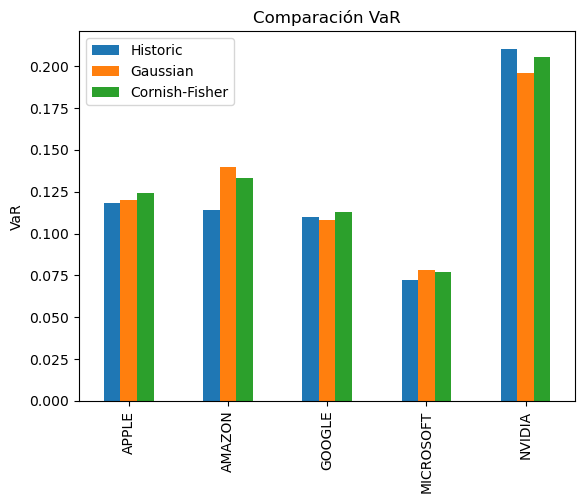

In [62]:
var_list=[r.var_historic(rt),r.var_gaussian(rt),r.var_gaussian(rt,modified=True)]
var_comparison=pd.concat(var_list, axis=1)
var_comparison.columns=["Historic","Gaussian", "Cornish-Fisher"]
ax=var_comparison.plot.bar(title="Comparación VaR")
ax.set_ylabel('VaR')

Por la información de la asimetria y la kurtosis se puede ver que las distribuciones de los retornos de las acciones son simetricas y mesocurticas, lo que indicaria que los retorno siguen una distribución normal, se hace el test de jaque bera para confirmar la hipotesis de normalidad. Se puede apreciar que no se puede rechazar la hipotesis nula de normalidad. Por lo anterior al calcular el valor en riesgo no centramos en el calculo del valor en riesgo Gaussiano. Los resultados se pueden contrastar con el drawdown donde las acciones con mayor valor en riesgo son NVIDIA y AMAZON, mientras las companias con menor valor en riesgo son google y microsoft. 

In [63]:
r.cvar_historic(rt)

APPLE        0.138047
AMAZON       0.171518
GOOGLE       0.138258
MICROSOFT    0.090670
NVIDIA       0.261589
dtype: float64

In [65]:
cov=rt.cov()

<AxesSubplot:title={'center':'Modelo Markowitz'}, xlabel='Volatilidad', ylabel='Retornos'>

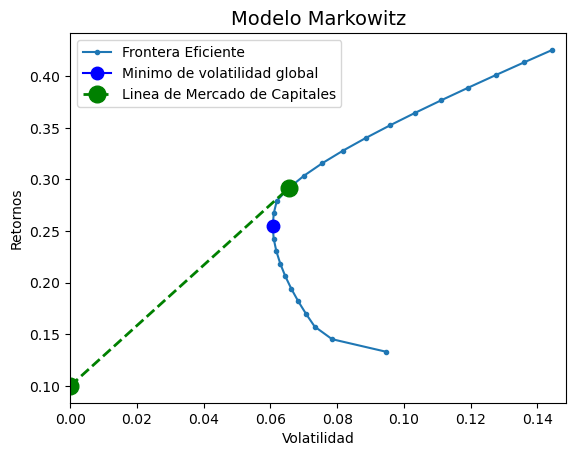

In [79]:
r.plot_ef(rt_anualizado,cov,25,show_cml=True,risk_free=0.1,show_gmv=True)

In [81]:
portafolio_gmv=r.gmv(cov)
portafolio_gmv.round(2)

array([0.  , 0.  , 0.19, 0.81, 0.  ])

In [84]:
weights=pd.DataFrame({"Compañia":prices.columns,"Weights":portafolio_gmv.round(3)})

In [85]:
weights

,Compañia,Weights
0,APPLE,0.000
1,AMAZON,0.000
2,GOOGLE,0.189
3,MICROSOFT,0.811
4,NVIDIA,0.000


La frontera eficiente representa el conjunto de portafolios donde no es posible obtener una volatilidad menor para un conjunto dado de retornos objetivos. Esta frontera simboliza la elección racional de un inversor enfocado en la relación riesgo-retorno, buscando diversificar para minimizar el riesgo sin comprometer el retorno. En la práctica, el análisis de Markowitz es susceptible a errores de estimación en los parámetros; por lo tanto, si se alimenta al optimizador con datos erróneos, se obtendrá un portafolio mal especificado, propenso a soluciones extremas. Este fenómeno es problemático, debido a que el activo con la mayor asignación de capital es el que posee el mayor riesgo de estimación.  Dado que los estimadores de covarianza suelen ser más fiables que los de retorno esperado, se prefiere el enfoque de mínima varianza global. Este enfoque, que no requiere la especificación de retornos esperados, se sitúa sobre la frontera eficiente, optimizando la selección de portafolios bajo el criterio de mínima varianza.
